<a href="https://colab.research.google.com/github/zulfacn/PortoFolio/blob/master/World_Happiness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WORLD HAPPINESS ANALYSIS**

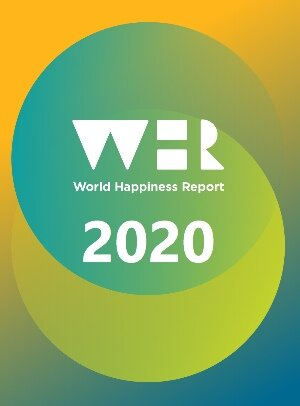

   The World Happiness Report is a landmark survey of the state of global happiness. The first report published in 2012. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


---


The dataset used here are from World Happiness Report from 2017 to 2020. The datasets give the happiness rank and happiness score from 155, 157 and 154 countries all arpund the world based on year 2017, 2018-2019, 2020 respectively.  The happiness score is based on six factors; family, life expectansy, economy, generosity, trust in government and freedom. 



---

The purposes from doing world happiness analysis is to find which factor give high contribution to happiness score so that people and countries can focus to improve the more contributed factor in order to achieve higher happiness score. 


---

This notebook will include the pre-processing data, Modeling and Evaluation from World Happiness dataset. 

The dataset obtained from: 

1.   https://www.kaggle.com/unsdsn/world-happiness
2.   https://worldhappiness.report/ed/2017/
3.   https://worldhappiness.report/ed/2018/
4. https://worldhappiness.report/ed/2019/
5. https://worldhappiness.report/ed/2020/



---

**The Steps we are going to do**


1.   Importing needed libraries 
2.   Reading the dataset from Excel File 
3.   Pre-prosessing data; check for missing values and replace missing value
4.   Exploratory Data Analysis
5.   Machine Learning: Clustering (each year) and prediction of world happiness score for the next year with Linear Regression. 



#### **1. Importing Needed Libraries**

In [ ]:
pip install pulp

     |████████████████████████████████| 40.6MB 104kB/s 


In [ ]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from pulp import *
from tabulate import tabulate
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os
import plotly.figure_factory as ff
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.



#### **2. Reading Dataset from Excel File**

In [ ]:
uploaded = files.upload()

Saving Data Challenge 2.xlsx to Data Challenge 2.xlsx


In [ ]:
df =  pd.ExcelFile(io.BytesIO(uploaded['Data Challenge 2.xlsx']))
df_2017 = pd.read_excel(df, '2017')
df_2018 = pd.read_excel(df, '2018')
df_2019 = pd.read_excel(df, '2019')
df_2020 = pd.read_excel(df, '2020')

In [ ]:
df_2017.head()

,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Norway,Western Europe,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,Western Europe,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,Western Europe,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,Western Europe,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,Western Europe,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


In [ ]:
df_2018.head()

,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,Western Europe,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,Western Europe,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,Western Europe,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,Western Europe,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [ ]:
df_2019.head()

,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df_2020.head()

,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101


#### **3. Pre-Processing Data**

##### **Check Missing Values**

In [ ]:
#check missing value for dataset year 2017 
df_2017.eq(0).sum()

Country or region               0
Region                          0
Score                           0
GDP per capita                  1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       1
dtype: int64

In [ ]:
#check missing value for dataset year 2018
df_2018.eq(0).sum()

Country or region               0
Region                          0
Score                           0
GDP per capita                  1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       2
dtype: int64

In [ ]:
#check for missing value for dataset year 2019
df_2019.eq(0).sum()

Country or region               0
Region                          0
Score                           0
GDP per capita                  1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       1
dtype: int64

In [ ]:
#check for missing value for dataset 2020
df_2020.eq(0).sum()

Country                         0
Region                          0
Score                           0
GDP per capita                  1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       1
dtype: int64

##### **Replace Missing Values**

###### **YEAR 2017**

In [ ]:
rata_GDP7=df_2017['GDP per capita'].astype('float').mean(axis=0)
print("Rerata GDP per capita 2017:", rata_GDP7)

Rerata GDP per capita 2017: 0.9847182019463474


In [ ]:
df_2017["GDP per capita"].replace(np.nan, rata_GDP7, inplace=True)

In [ ]:
rata_social7=df_2017['Social support'].astype('float').mean(axis=0)
print("Rerata Social support 2017:", rata_social7)

Rerata Social support 2017: 1.1888977504545641


In [ ]:
df_2017["Social support"].replace(np.nan, rata_social7, inplace=True)

In [ ]:
rata_healthy7=df_2017['Healthy life expectancy'].astype('float').mean(axis=0)
print("Rerata Healthy life expectancy 2017:", rata_healthy7)

Rerata Healthy life expectancy 2017: 0.5513407826123219


In [ ]:
df_2017["Healthy life expectancy"].replace(np.nan, rata_healthy7, inplace=True)

In [ ]:
rata_freedom7=df_2017['Freedom to make life choices'].astype('float').mean(axis=0)
print("Rerata Freedom to make life choices 2017:", rata_freedom7)

Rerata Freedom to make life choices 2017: 0.4087859728583886


In [ ]:
df_2017["Freedom to make life choices"].replace(np.nan, rata_freedom7, inplace=True)

In [ ]:
rata_perceptions7=df_2017['Perceptions of corruption'].astype('float').mean(axis=0)
print("Rerata Perceptions of corruption 2017:", rata_perceptions7)

Rerata Perceptions of corruption 2017: 0.12312022065142951


In [ ]:
rata_generosity7=df_2017['Generosity'].astype('float').mean(axis=0)
print("Rerata Generosity 2017:", rata_generosity7)

Rerata Generosity 2017: 0.24688347161657387


In [ ]:
df_2017["Generosity"].replace(np.nan, rata_generosity7, inplace=True)

In [ ]:
df_2017["Perceptions of corruption"].replace(np.nan, rata_perceptions7, inplace=True)

###### **YEAR 2018**

In [ ]:
rata_GDP=df_2018['GDP per capita'].astype('float').mean(axis=0)
print("Rerata GDP per capita:", rata_GDP)

Rerata GDP per capita: 0.8914487179487178


In [ ]:
df_2018["GDP per capita"].replace(np.nan, rata_GDP, inplace=True)

In [ ]:
rata_social=df_2018['Social support'].astype('float').mean(axis=0)
print("Rerata Social support:", rata_GDP)

Rerata Social support: 0.8914487179487178


In [ ]:
df_2018["Social support"].replace(np.nan, rata_social, inplace=True)

In [ ]:
rata_healthy=df_2018['Healthy life expectancy'].astype('float').mean(axis=0)
print("Rerata Healthy life expectancy:", rata_healthy)

Rerata Healthy life expectancy: 0.5973461538461537


In [ ]:
df_2018["Healthy life expectancy"].replace(np.nan, rata_healthy, inplace=True)

In [ ]:
rata_freedom=df_2018['Freedom to make life choices'].astype('float').mean(axis=0)
print("Rerata Freedom to make life choices:", rata_freedom)

Rerata Freedom to make life choices: 0.4545064102564102


In [ ]:
df_2018["Freedom to make life choices"].replace(np.nan, rata_freedom, inplace=True)

In [ ]:
rata_generosity=df_2018['Generosity'].astype('float').mean(axis=0)
print("Rerata Generosity:", rata_generosity)

Rerata Generosity: 0.1810064102564103


In [ ]:
df_2018["Generosity"].replace(np.nan, rata_generosity, inplace=True)

In [ ]:
rata_perceptions=df_2018['Perceptions of corruption'].astype('float').mean(axis=0)
print("Rerata Perceptions of corruption:", rata_perceptions)

Rerata Perceptions of corruption: 0.11200000000000002


In [ ]:
df_2018["Perceptions of corruption"].replace(np.nan, rata_perceptions, inplace=True)

###### **YEAR 2019**

In [ ]:
rata_GDP=df_2019['GDP per capita'].astype('float').mean(axis=0)
print("Rerata GDP per capita:", rata_GDP)

Rerata GDP per capita: 0.9051474358974363


In [ ]:
df_2019["GDP per capita"].replace(np.nan, rata_GDP, inplace=True)

In [ ]:
rata_social=df_2019['Social support'].astype('float').mean(axis=0)
print("Rerata Social support:", rata_GDP)

Rerata Social support: 0.9051474358974363


In [ ]:
df_2019["Social support"].replace(np.nan, rata_social, inplace=True)

In [ ]:
rata_healthy=df_2019['Healthy life expectancy'].astype('float').mean(axis=0)
print("Rerata Healthy life expectancy:", rata_healthy)

Rerata Healthy life expectancy: 0.7252435897435898


In [ ]:
df_2019["Healthy life expectancy"].replace(np.nan, rata_healthy, inplace=True)

In [ ]:
rata_freedom=df_2019['Freedom to make life choices'].astype('float').mean(axis=0)
print("Rerata Freedom to make life choices:", rata_freedom)

Rerata Freedom to make life choices: 0.3925705128205128


In [ ]:
df_2019["Freedom to make life choices"].replace(np.nan, rata_freedom, inplace=True)

In [ ]:
rata_generosity=df_2019['Generosity'].astype('float').mean(axis=0)
print("Rerata Generosity:", rata_generosity)

Rerata Generosity: 0.18484615384615383


In [ ]:
df_2019["Generosity"].replace(np.nan, rata_generosity, inplace=True)

In [ ]:
rata_perceptions=df_2019['Perceptions of corruption'].astype('float').mean(axis=0)
print("Rerata Perceptions of corruption:", rata_perceptions)

Rerata Perceptions of corruption: 0.11060256410256411


In [ ]:
df_2019["Perceptions of corruption"].replace(np.nan, rata_perceptions, inplace=True)

###### **YEAR 2020**

In [ ]:
rata_GDP=df_2020['GDP per capita'].astype('float').mean(axis=0)
print("Rerata GDP per capita:", rata_GDP)

Rerata GDP per capita: 0.8687711374870702


In [ ]:
df_2020["GDP per capita"].replace(np.nan, rata_GDP, inplace=True)

In [ ]:
rata_social=df_2020['Social support'].astype('float').mean(axis=0)
print("Rerata Social support:", rata_GDP)

Rerata Social support: 0.8687711374870702


In [ ]:
df_2020["Social support"].replace(np.nan, rata_social, inplace=True)

In [ ]:
rata_healthy=df_2020['Healthy life expectancy'].astype('float').mean(axis=0)
print("Rerata Healthy life expectancy:", rata_healthy)

Rerata Healthy life expectancy: 0.692869072207828


In [ ]:
df_2020["Healthy life expectancy"].replace(np.nan, rata_healthy, inplace=True)

In [ ]:
rata_freedom=df_2020['Freedom to make life choices'].astype('float').mean(axis=0)
print("Rerata Freedom to make life choices:", rata_freedom)

Rerata Freedom to make life choices: 0.4635830325336238


In [ ]:
df_2020["Freedom to make life choices"].replace(np.nan, rata_freedom, inplace=True)

In [ ]:
rata_generosity=df_2020['Generosity'].astype('float').mean(axis=0)
print("Rerata Generosity:", rata_generosity)

Rerata Generosity: 0.18937483729392873


In [ ]:
df_2020["Generosity"].replace(np.nan, rata_generosity, inplace=True)

In [ ]:
rata_perceptions=df_2020['Perceptions of corruption'].astype('float').mean(axis=0)
print("Rerata Perceptions of corruption:", rata_perceptions)

Rerata Perceptions of corruption: 0.13071751432094625


In [ ]:
df_2020["Perceptions of corruption"].replace(np.nan, rata_perceptions, inplace=True)

### **4. Exploratory Data Analysis**

In this part we will visualize data to see data distribution based on each region, to see correlation between paramaters, and Top 10 Country for each parameters in each respective years 

#### **Data Distribution based on Region**



In [ ]:
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)


###### **YEAR 2017**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



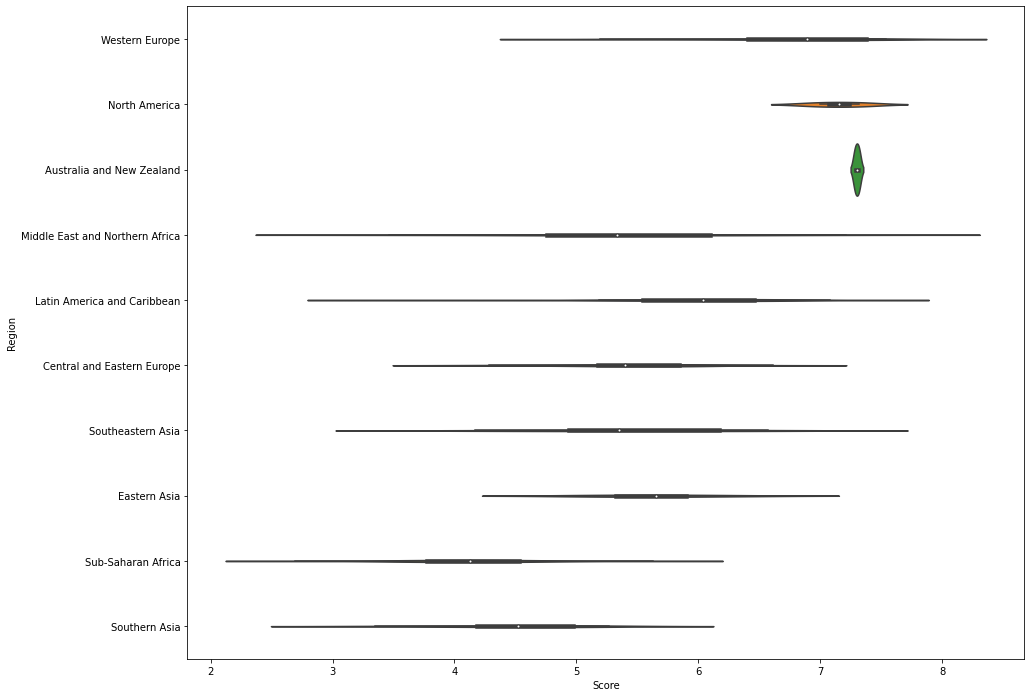

In [ ]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(df_2017['Score'], df_2017['Region'])
plt.show()

###### **YEAR 2018**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

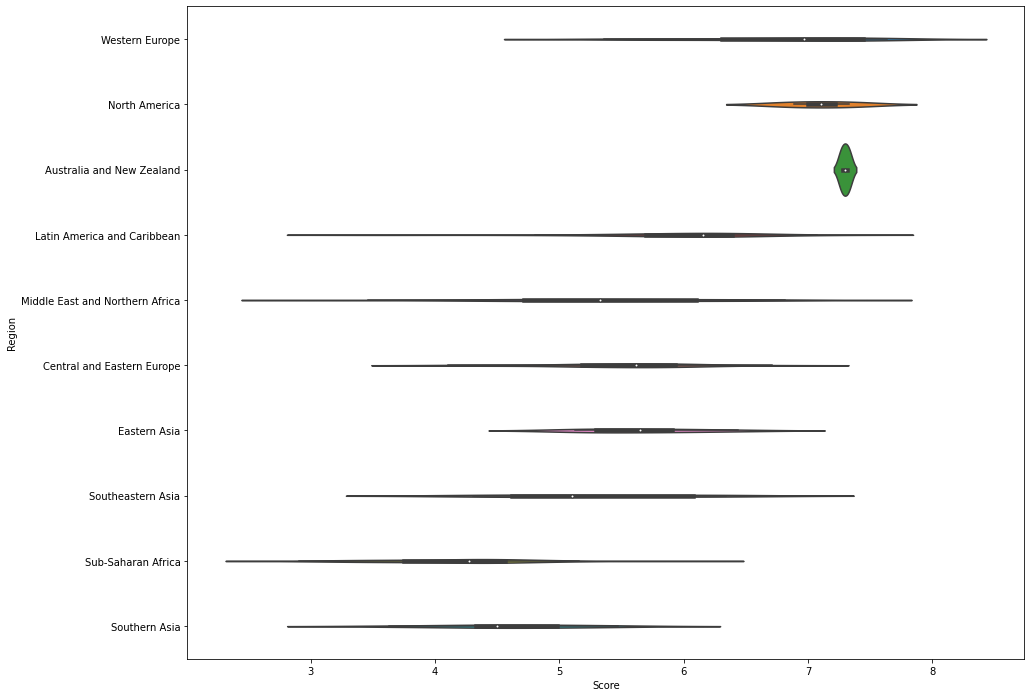

In [ ]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(df_2018['Score'], df_2018['Region'])
plt.show

###### **YEAR 2019**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



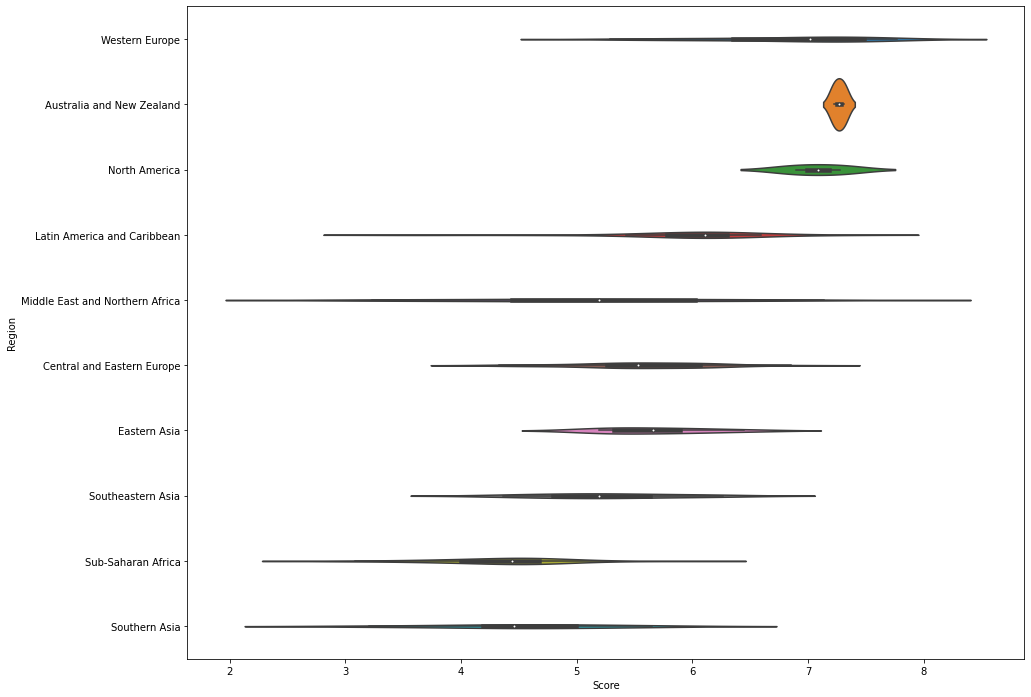

In [ ]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(df_2019['Score'], df_2019['Region'])
plt.show()

###### **YEAR 2020**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



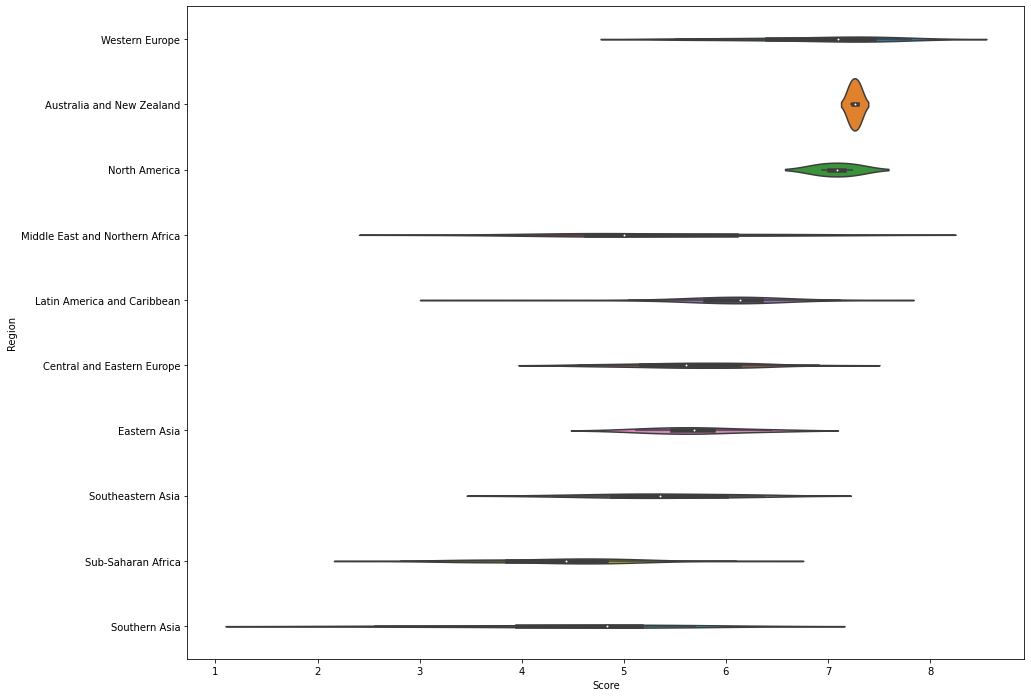

In [ ]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(df_2020['Score'], df_2020['Region'])
plt.show()

Based on the plot above, data distribution based on each region per year didn't show any significant change. The top 3 of Happiness Score every year always dominated by Western Europe, North America, and Autralia & New Zealand. 

#### **Correlation between Parameters** 

In this part we want to show what parameters have strong possitive correlation to Happiness Score by each Region in every years. 

###### **YEAR 2017**

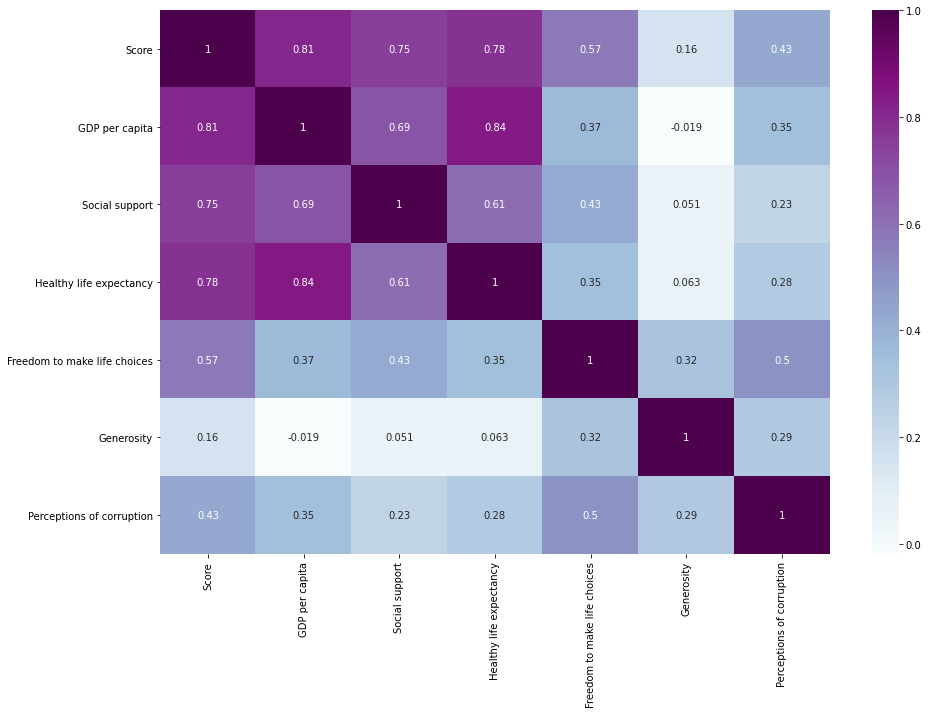

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df_2017.corr(), cmap = 'BuPu', annot = True)

plt.show()

In 2017, GDP per Capita, Social Support, and Healthy Expectancy have high correlation to Happines Score

###### **YEAR 2018**

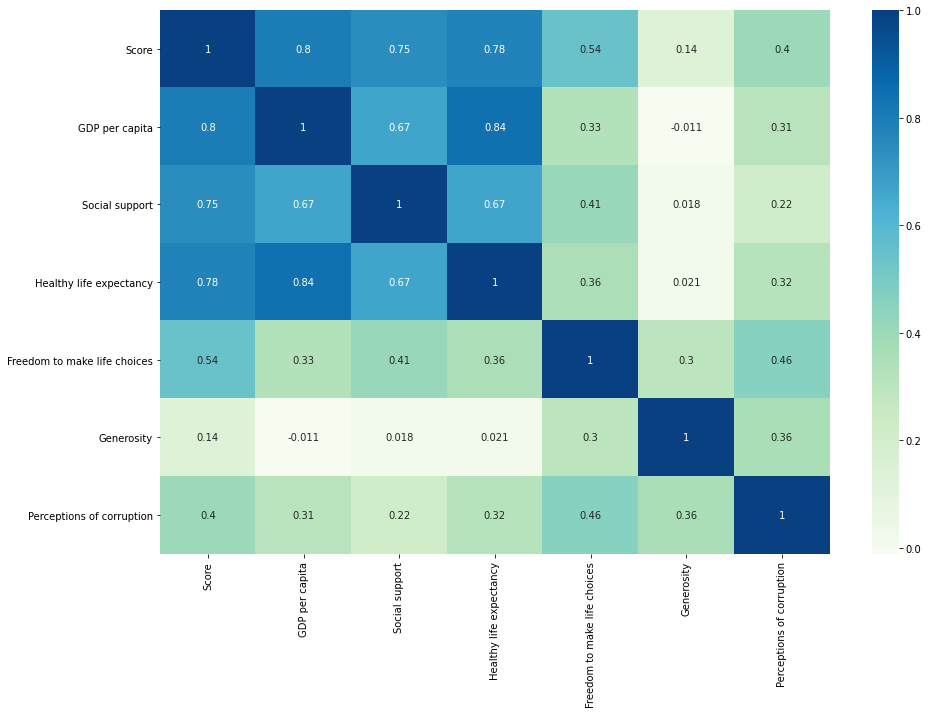

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df_2018.corr(), cmap = 'GnBu', annot = True)

plt.show()


In 2018, only GDP per Capita and Healthy life ecpectancy have high correlation to Happiness Score.

######**YEAR 2019**

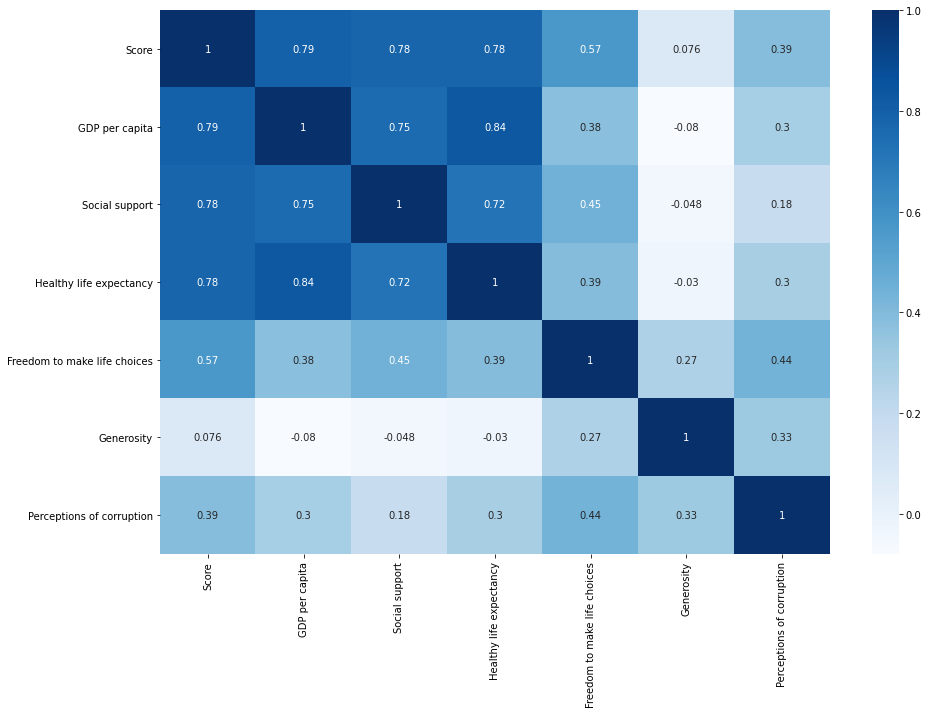

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df_2019.corr(), cmap = 'Blues', annot = True)

plt.show()

Same with 2017, in 2019 GDP per Capita, Social Support, and Healthy life Expectancy have high correlation to Happiness Score

###### **YEAR 2020**

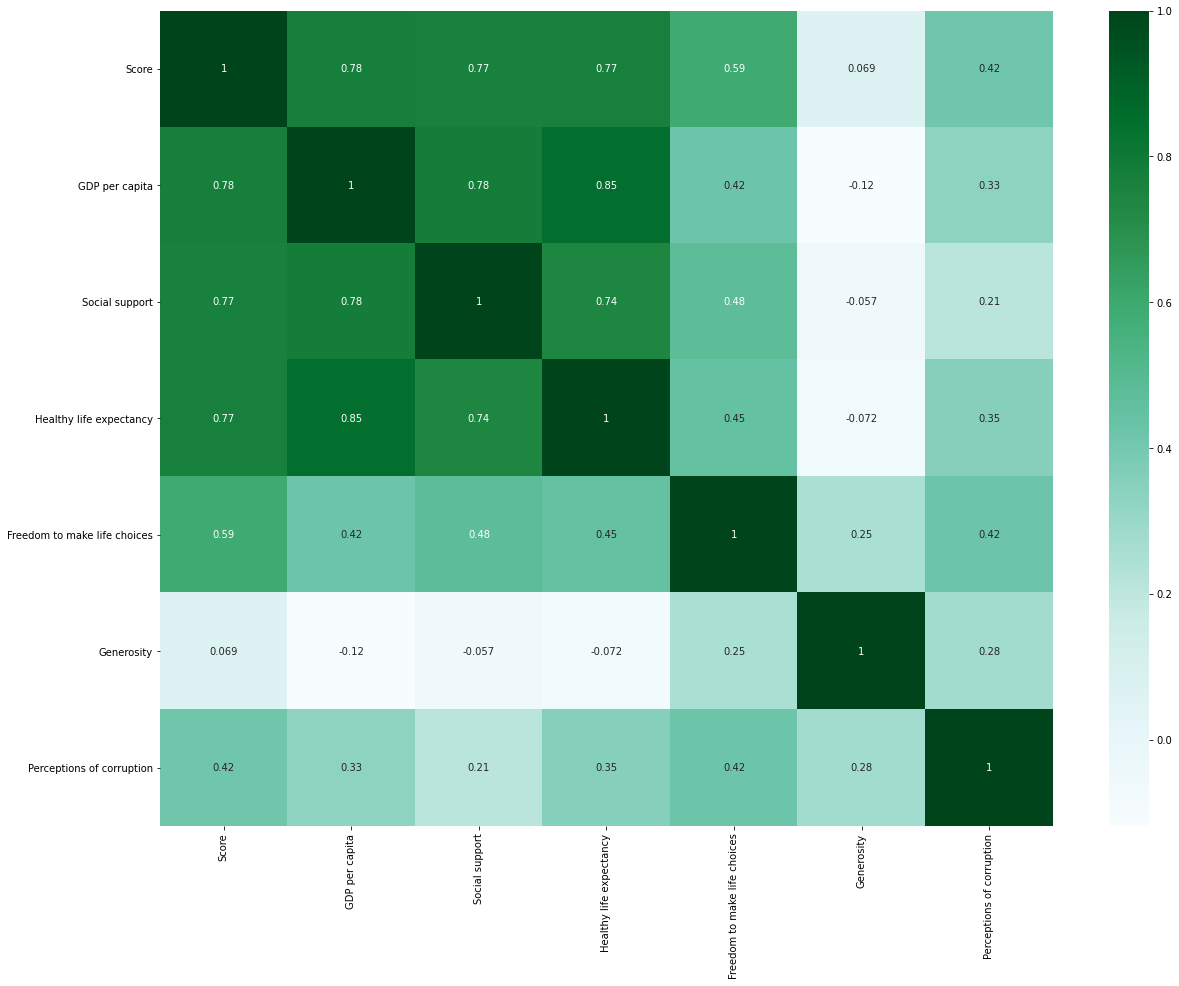

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df_2020.corr(), cmap = 'BuGn', annot = True)

plt.show()

It's still the same with the previous year, in 2020 GDP per Capita, Social Support and Healthy Life Expectancy have high positive correlation with happiness score.


In the next part we will see the correlation between parameter in each regions, in the year of 2020 

##### **Correlation Between Parameters  in Western Europe (2020)** 

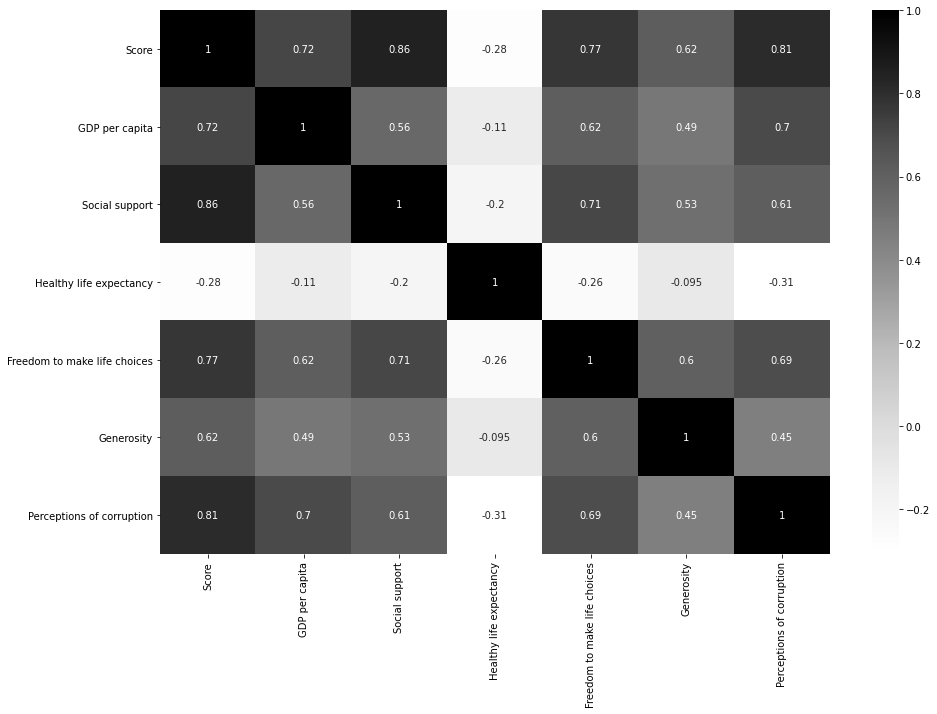

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)

d = df_2020.loc[lambda df_2020: df_2020['Region'] == 'Western Europe']
sns.heatmap(d.corr(), cmap = 'Greys', annot = True)

plt.show()

In the year of 202o at Western Europe Region, Happiness Score has possitively strong correlation with Socaial Support and GDP per Capita. On the other hand, Happiness Score has negative correlation with healthy life expectancy. Its maybe because of the covid-19 pandemic which happened (almost) all 2020. 


##### **Correlation Between Parameters in Eastern Asia (2020)**

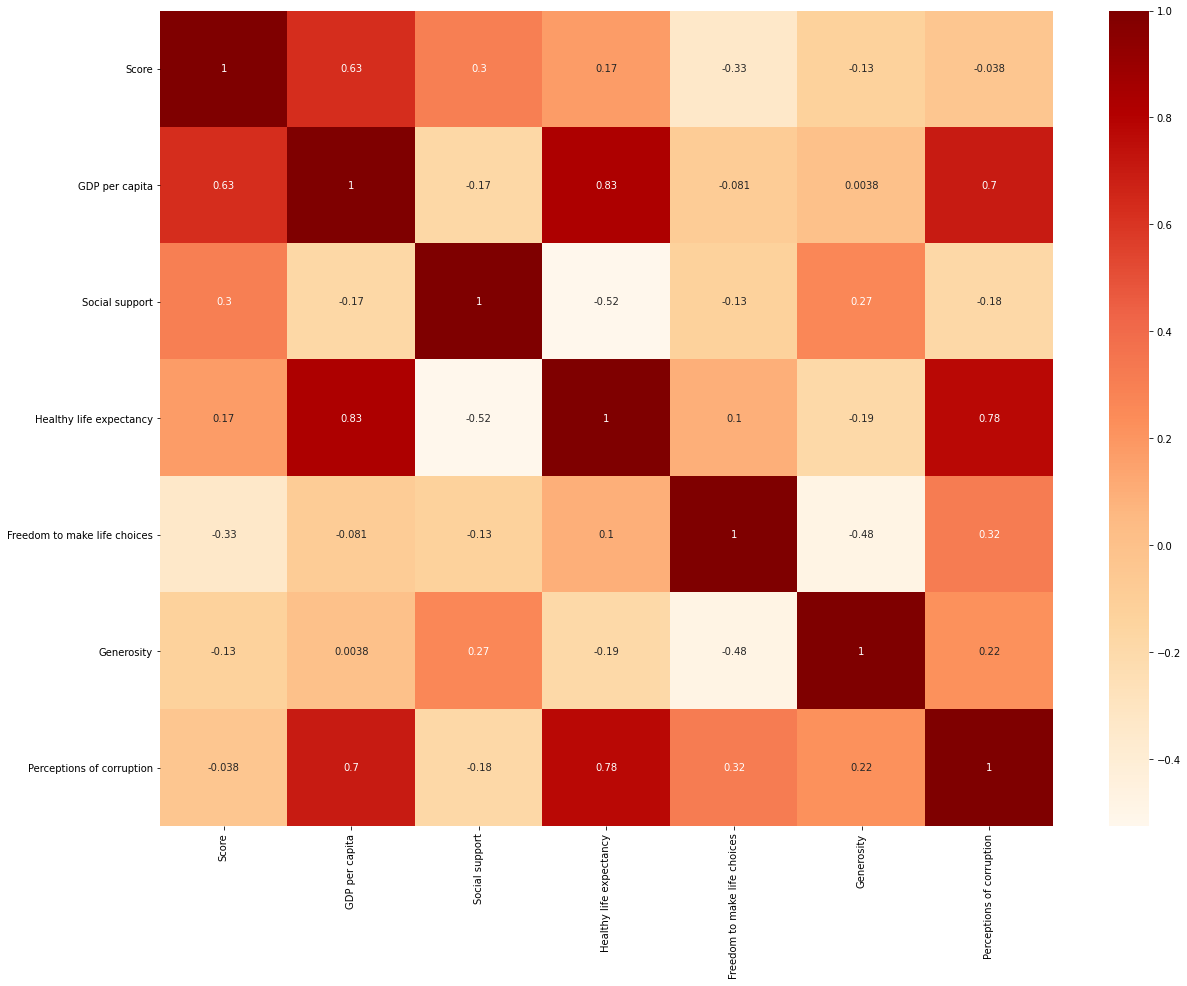

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)

d = df_2020.loc[lambda df_2020: df_2020['Region'] == 'Eastern Asia']
sns.heatmap(d.corr(), cmap = 'OrRd', annot = True)

plt.show()

In 2020, GDP per Capita in Eastern Asia has positive correlation with Happiness Score but not in high value. GDP per Capita has positive correlation with Healthy life expectancy and Perceptions of Corruption. It can be concluded that Eastern Asia citizen have high trust to their government when it comes to Corruption and they feel satiesfied with the Health Life Expectancy eventhough there is Covid-19 pandemic in 2020. 

##### **Correlation of Parameters in Northern America (2020)**

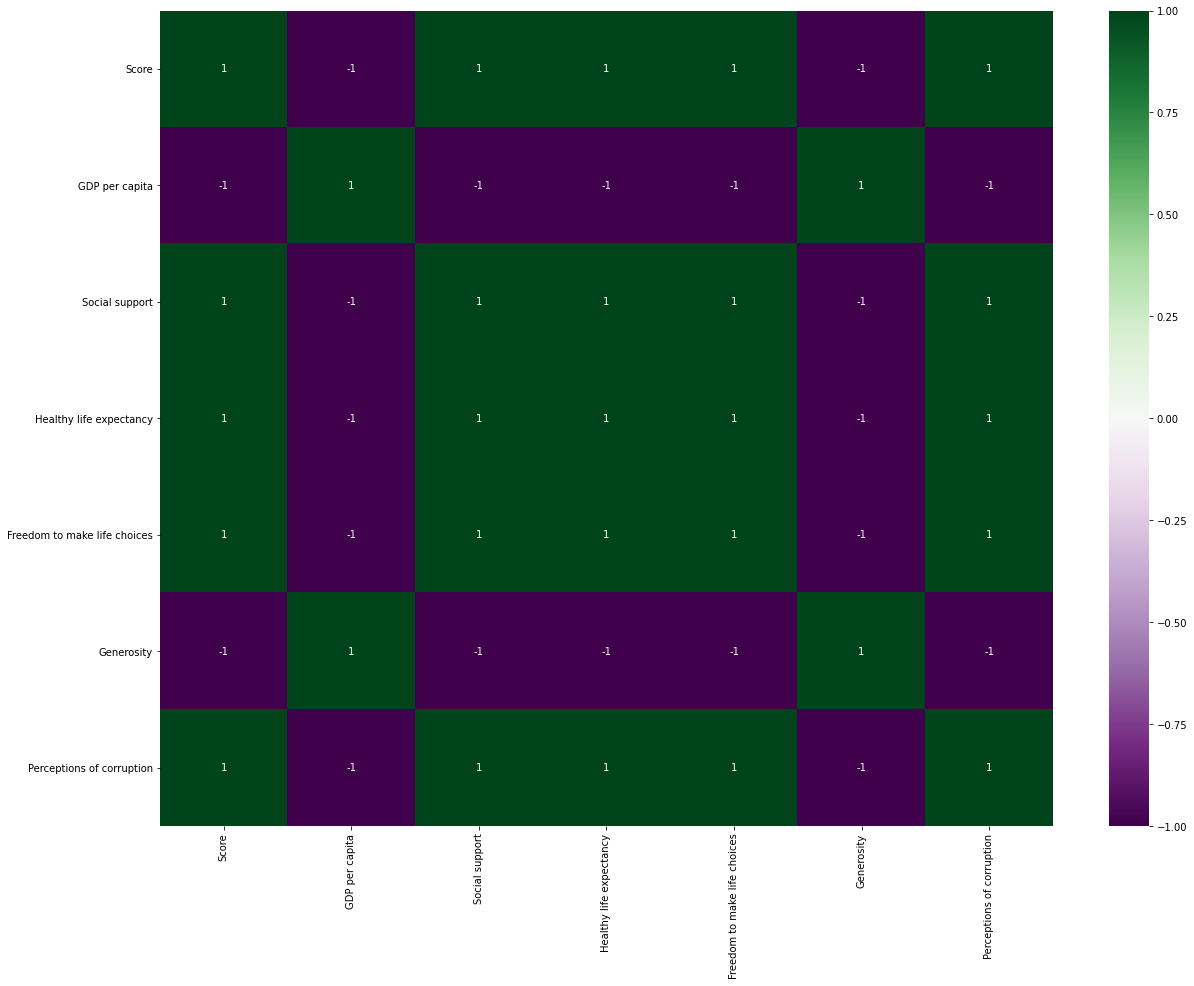

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)

d = df_2020.loc[lambda df_2020: df_2020['Region'] == 'North America']
sns.heatmap(d.corr(), cmap = 'PRGn', annot = True)

plt.show()

North America's Happiness Score has positive correlation with Social Support, Healthy Life Expectancy, Freedom to Make Life Choices and Perception of Corruption. 

##### **Correlation Between Parameters at Middle East and Northern Africa (2020)**

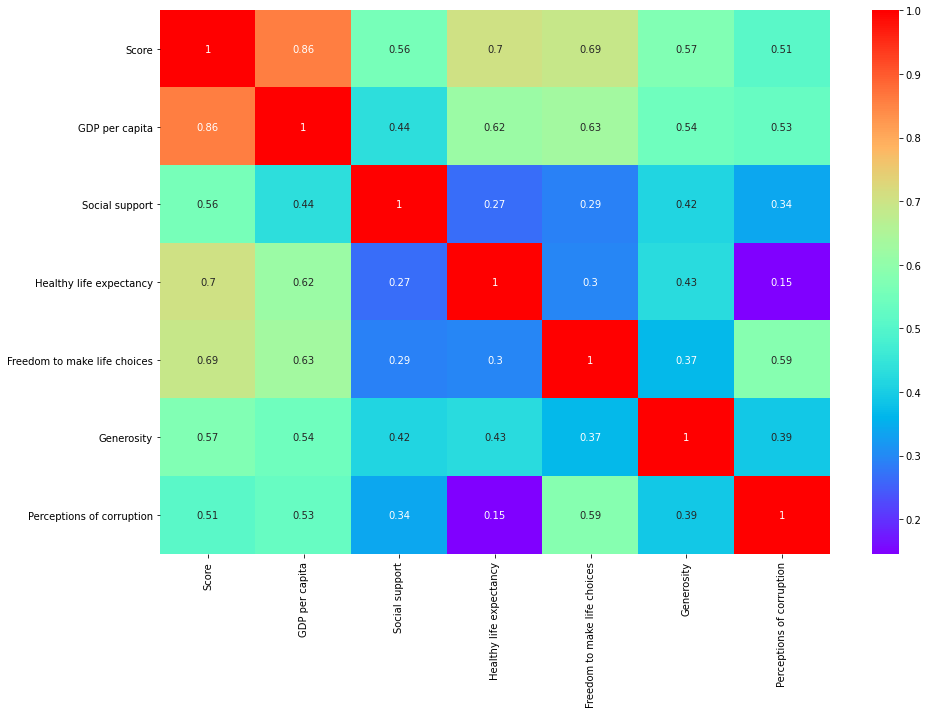

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)

d = df_2020.loc[lambda dd_2020: df_2020['Region'] == 'Middle East and Northern Africa']

sns.heatmap(d.corr(), cmap = 'rainbow', annot = True)

plt.show()

In Region Middle East and Northern Africa, only GDP per Capitas has positive correlation with Happiness Score.  

##### **Top 10 Contry based on each Parameter at 2020**

1. Generosity 



In [ ]:
df_2020[['Country', 'Generosity']].sort_values(by = 'Generosity',
                                                ascending = False).head(10)

,Country,Generosity
132,Myanmar,0.569814
83,Indonesia,0.542647
141,Haiti,0.463910
112,Gambia,0.425990
120,Kenya,0.393902
53,Thailand,0.376709
12,United Kingdom,0.373433
37,Uzbekistan,0.363311
3,Iceland,0.362330
21,Malta,0.341181


2. Perceptions of Coruption

In [ ]:
df_2020[['Country', 'Perceptions of corruption']].sort_values(by = 'Perceptions of corruption',
                                                                     ascending = False).head(10)

,Country,Perceptions of corruption
30,Singapore,0.533162
1,Denmark,0.495260
149,Rwanda,0.485542
0,Finland,0.477857
7,New Zealand,0.461268
6,Sweden,0.442066
4,Norway,0.434101
2,Switzerland,0.407946
15,Ireland,0.373433
5,Netherlands,0.368570


3. Freedom to Make Life Choices 

In [ ]:
df_2020[['Country', 'Freedom to make life choices']].sort_values(by = 'Freedom to make life choices',
                                                                     ascending = False).head(10)

,Country,Freedom to make life choices
37,Uzbekistan,0.693270
105,Cambodia,0.674940
4,Norway,0.670201
1,Denmark,0.665040
0,Finland,0.662317
3,Iceland,0.661981
20,United Arab Emirates,0.652936
82,Vietnam,0.650836
6,Sweden,0.650298
7,New Zealand,0.646790


4. Healthy Life Expectancy 

In [ ]:
df_2020[['Country', 'Healthy life expectancy']].sort_values(by = 'Healthy life expectancy',
                                                                     ascending = False).head(10)

,Country,Healthy life expectancy
30,Singapore,1.137814
77,Hong Kong S.A.R. of China,1.136631
61,Japan,1.072881
27,Spain,1.051343
2,Switzerland,1.040533
22,France,1.029714
44,Cyprus,1.026125
75,North Cyprus,1.026125
11,Australia,1.022608
60,South Korea,1.022543


5. Social Support

In [ ]:
df_2020[['Country', 'Social support']].sort_values(by = 'Social support',
                                                                     ascending = False).head(10)

,Country,Social support
3,Iceland,1.547567
94,Turkmenistan,1.510477
1,Denmark,1.503449
0,Finland,1.499526
4,Norway,1.495173
7,New Zealand,1.487218
11,Australia,1.477146
2,Switzerland,1.472403
15,Ireland,1.470596
32,Slovenia,1.464678


6. GDP per Capita 

In [ ]:
df_2020[['Country', 'GDP per capita']].sort_values(by = 'GDP per capita',
                                                                     ascending = False).head(10)

,Country,GDP per capita
9,Luxembourg,1.536676
30,Singapore,1.519580
15,Ireland,1.446887
20,United Arab Emirates,1.431086
47,Kuwait,1.424834
4,Norway,1.424207
2,Switzerland,1.390774
77,Hong Kong S.A.R. of China,1.376746
17,United States,1.373987
5,Netherlands,1.338946


### **5. Machine Learning**

#### **K-Mean CLustering for Year 2017**

In [ ]:
df_2017c = df_2017.drop('Country or region',axis=1)
df_2017c = df_2017c.drop('Region', axis=1)
df_2017c.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


In [ ]:
# Normalizing based on Standard Deviation
from sklearn.preprocessing import StandardScaler
X7 = df_2017c.values[:,0:]
X7 = np.nan_to_num(X7)
Clus_dataSet = StandardScaler().fit_transform(X7)
Clus_dataSet

array([[ 1.93599602,  1.50618765,  1.20357658, ...,  1.51583565,
         0.8569643 ,  1.90308437],
       [ 1.92269283,  1.18651768,  1.26503623, ...,  1.45285861,
         0.80685634,  2.73999784],
       [ 1.90672969,  1.1823454 ,  1.47266877, ...,  1.46058981,
         1.70201314,  0.30006609],
       ...,
       [-1.77816933, -1.12910094, -0.51306362, ..., -0.12552914,
         0.79923322, -0.56334657],
       [-2.17193469, -2.12929212, -1.95262416, ..., -2.33348285,
        -0.31596505, -0.38459935],
       [-2.35994869, -2.34773594, -4.15212515, ..., -0.92262375,
         0.253028  , -0.65680192]])

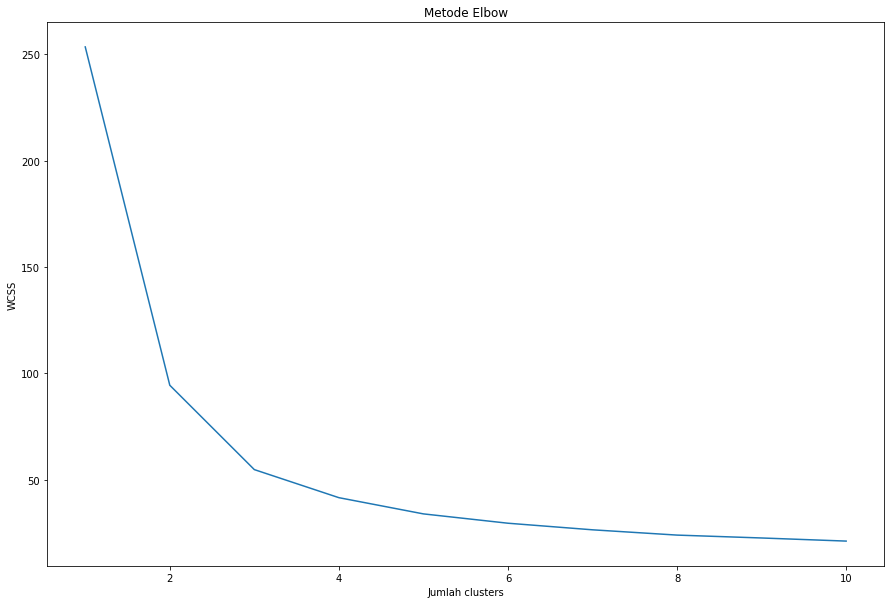

In [ ]:
#find the elbow point 

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans7 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans7.fit(X7)
    wcss.append(kmeans7.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# based on elbow point plot we get 3 clusters 
clusterNum7 = 3
k_means7 = KMeans(init = "k-means++", n_clusters = clusterNum7, n_init = 12)
k_means7.fit(X7)
labels7 = k_means7.labels_
print(labels7)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2]


In [ ]:
df_2017c["Cluster"] = labels7
df_2017c

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,1
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,1
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,1
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,1
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,1
...,...,...,...,...,...,...,...,...
150,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,2
151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,2
152,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,2
153,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,2


In [ ]:
#check centorid value by average parameters at each cluster
df_2017c.groupby('Cluster').mean()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Cluster,,,,,,,
0,5.454108,1.065176,1.258058,0.620656,0.384246,0.206652,0.083944
1,6.802375,1.412830,1.423133,0.760655,0.537888,0.307135,0.212035
2,4.065220,0.537633,0.911602,0.293780,0.337407,0.250983,0.102917


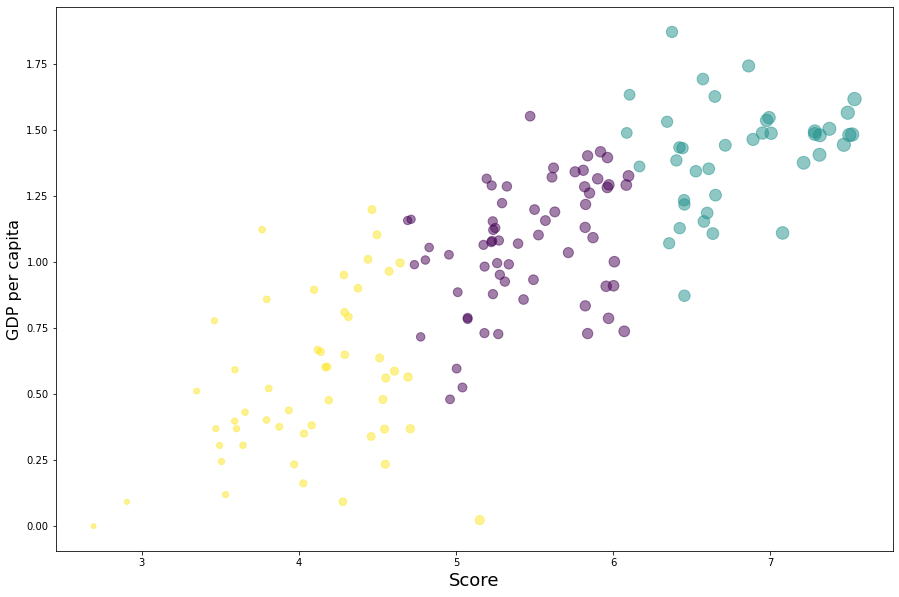

In [ ]:
#social support and Healthy life expectancy distribution data
area = np.pi * ( X7[:, 0])**2
plt.scatter(X7[:, 0], X7[:, 1], s=area, c=labels7.astype(np.float), alpha=0.5)
plt.xlabel('Score', fontsize=18)
plt.ylabel('GDP per capita', fontsize=16)
plt.show()

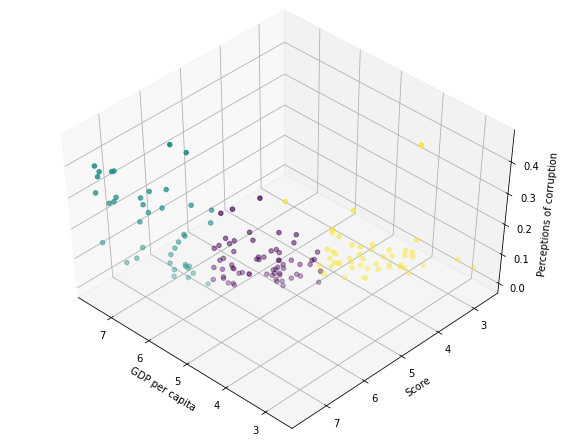

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
# plt.ylabel('Score', fontsize=18)
# plt.xlabel('GDP per capita', fontsize=16)
# plt.zlabel('Perceptions of corruption', fontsize=16)
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Score')
ax.set_zlabel('Perceptions of corruption')
ax.scatter(X7[:, 0], X7[:, 0], X7[:, 6], c= labels7.astype(np.float))

#### **K-Mean CLustering for Year 2020**

In [ ]:
df_2020c = df_2020.drop('Country', axis=1)
df_2020c = df_2020c.drop('Region', axis=1)
df_2020c.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101


In [ ]:
from sklearn.preprocessing import StandardScaler
X0 = df_2020c.values[:,0:]
X0 = np.nan_to_num(X0)
Clus_dataSet0 = StandardScaler().fit_transform(X0)
Clus_dataSet0

array([[ 2.10661952,  1.12182687,  1.20282353, ...,  1.4123599 ,
        -0.29682884,  3.07948805],
       [ 1.9595007 ,  1.23432523,  1.21654488, ...,  1.43171282,
         0.53379876,  3.23387122],
       [ 1.88219801,  1.40627109,  1.10796527, ...,  1.17526106,
         0.79623216,  2.45930209],
       ...,
       [-1.96101593, -1.19399548, -0.37692001, ..., -0.61245168,
        -0.37998114, -0.44167927],
       [-2.39632821, -1.56167403, -2.10658333, ..., -2.82831843,
         0.20544881, -0.17352375],
       [-2.62156136, -1.53036212, -2.79502813, ..., -3.29459   ,
        -0.54100918, -1.14872536]])

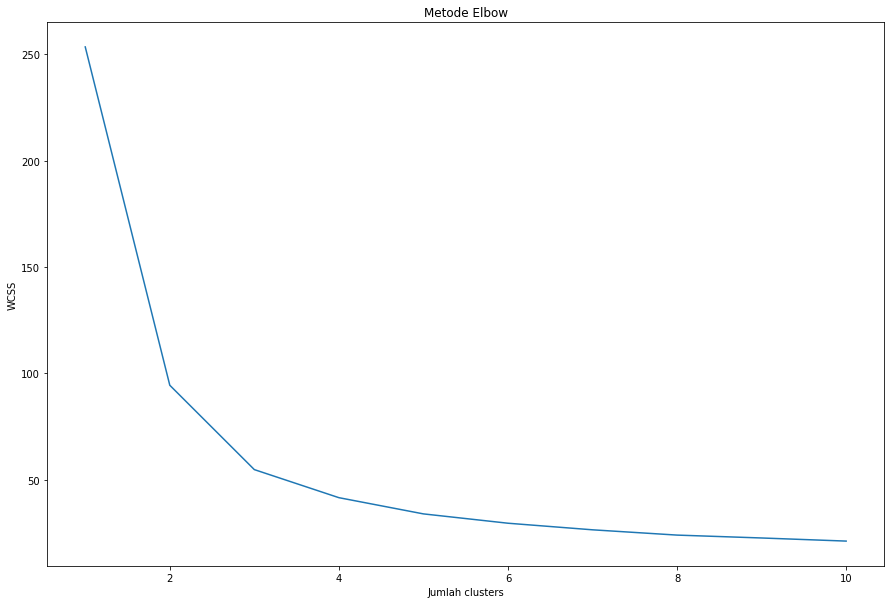

In [ ]:
from sklearn.cluster import KMeans
wcss0 = []
for i in range(1, 11):
    kmeans0 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans0.fit(X0)
    wcss0.append(kmeans0.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
clusterNum0 = 3
k_means0 = KMeans(init = "k-means++", n_clusters = clusterNum0, n_init = 12)
k_means0.fit(X0)
labels0 = k_means0.labels_
print(labels0)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [ ]:
df_2020c["Cluster"] = labels0
df_2020c

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
0,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2
1,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2
2,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2
3,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2
4,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2
...,...,...,...,...,...,...,...,...
148,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,0
149,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0
150,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0
151,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,0


In [ ]:
df_2020c.groupby('Cluster').mean()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Cluster,,,,,,,
0,4.384207,0.534422,0.887365,0.455561,0.381764,0.195622,0.104267
1,5.852519,1.009029,1.297153,0.804960,0.488873,0.161222,0.092645
2,7.166575,1.321179,1.436338,0.978436,0.599886,0.253265,0.305817


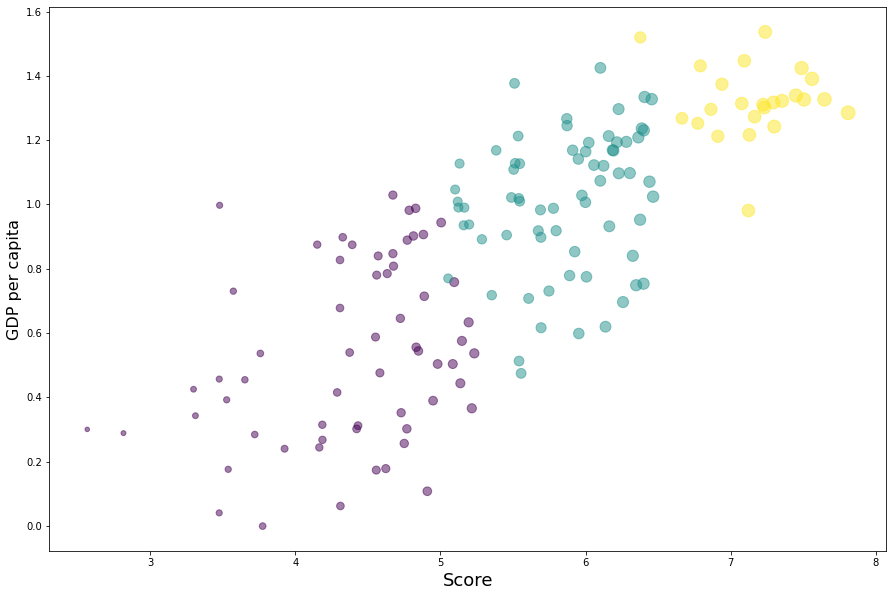

In [ ]:
area = np.pi * ( X0[:, 0])**2
plt.scatter(X0[:, 0], X0[:, 1], s=area, c=labels0.astype(np.float), alpha=0.5)
plt.xlabel('Score', fontsize=18)
plt.ylabel('GDP per capita', fontsize=16)
plt.show()

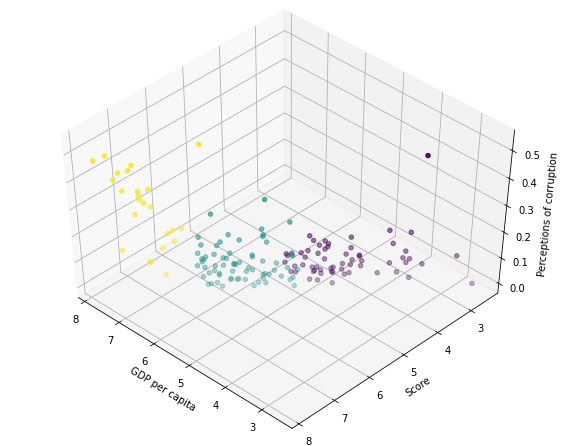

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
# plt.ylabel('Score', fontsize=18)
# plt.xlabel('GDP per capita', fontsize=16)
# plt.zlabel('Perceptions of corruption', fontsize=16)
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Score')
ax.set_zlabel('Perceptions of corruption')
ax.scatter(X0[:, 0], X0[:, 0], X0[:, 6], c= labels0.astype(np.float))

In [ ]:
#Evaluation

from sklearn.metrics import silhouette_samples, silhouette_score

# Get silhouette samples
silhouette_vals_2017 = silhouette_samples(Clus_dataSet, labels7)
silhouette_vals_2020 = silhouette_samples(Clus_dataSet0, labels0)

# Get the average silhouette score and plot it
avg_score_2017 = np.mean(silhouette_vals_2017)
avg_score_2020 = np.mean(silhouette_vals_2020)

print("Rerata Silhouette Koefisien Data thn 2017: {:5.5f}".format(avg_score_2017))
print("Rerata Silhouette Koefisien Data thn 2020: {:5.5f}".format(avg_score_2020))

Rerata Silhouette Koefisien Data thn 2017: 0.20755
Rerata Silhouette Koefisien Data thn 2020: 0.27290


In [ ]:
pip install pycountry

     |████████████████████████████████| 10.1MB 5.0MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=2bf923caa28b4fd812b5ec4a1934791297e80cfc25a056ce69c6f5beefb64c8d
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [ ]:
pip install geopandas

     |████████████████████████████████| 972kB 5.7MB/s 
     |████████████████████████████████| 6.5MB 42.7MB/s 
     |████████████████████████████████| 14.8MB 317kB/s 


In [ ]:
pip install mapclassify

In [ ]:
# World Map Visualization

import pycountry 
import geopandas
import mapclassify

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
    
# create a column for code 
df_2017c['Country'] = df_2017['Country or region']
df_2020c['Country'] = df_2020['Country']

df_2017c['CODE'] = alpha3code(df_2017['Country or region'])
df_2020c['CODE'] = alpha3code(df_2020['Country'])

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
world = world.drop(columns=['pop_est','name','gdp_md_est'])

# then merge with our data 
merge_2017=pd.merge(world,df_2017c,on='CODE')
merge_2020=pd.merge(world,df_2020c,on='CODE')

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:236: UserWarning:


/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:238: UserWarning:




Text(0.5, 1.0, '2017 Happiness Word Scores')

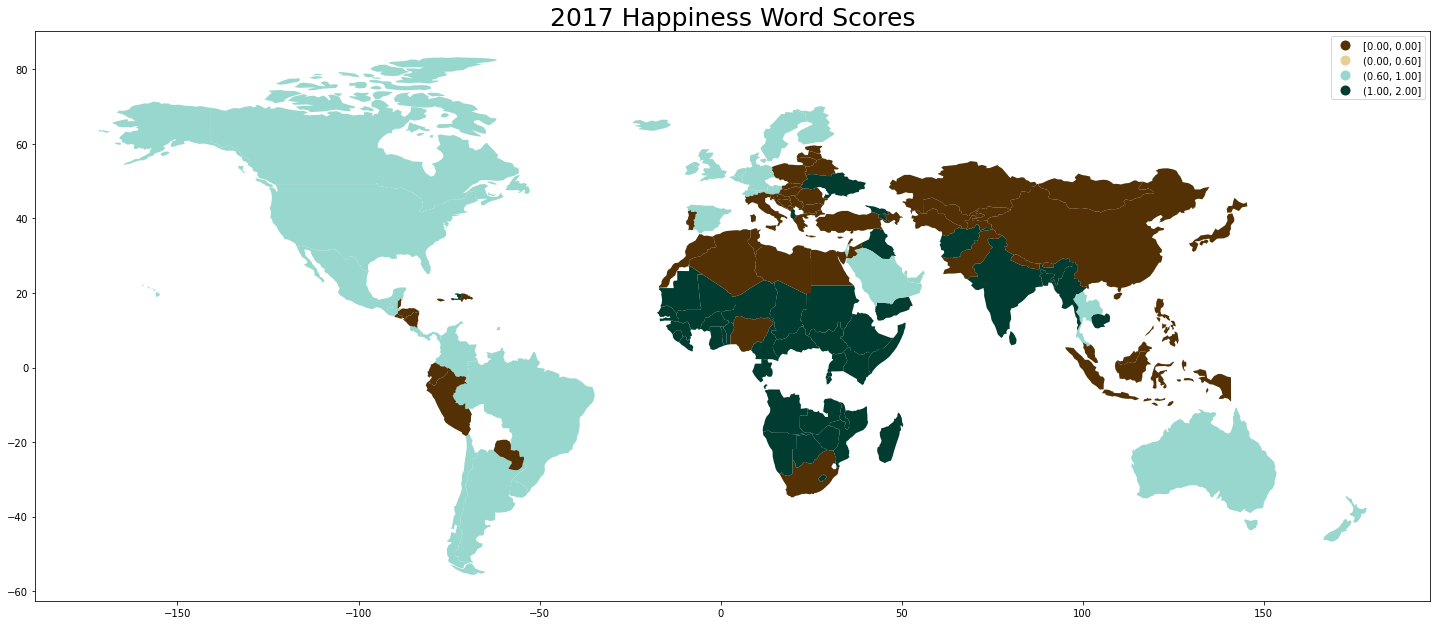

In [ ]:
merge_2017.plot(column='Cluster', scheme="quantiles",
           figsize=(25, 20),
           legend=True ,cmap='BrBG')

plt.title('2017 Happiness Word Scores',fontsize=25)

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:236: UserWarning:


/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:238: UserWarning:




Text(0.5, 1.0, '2020 Happiness Word Scores')

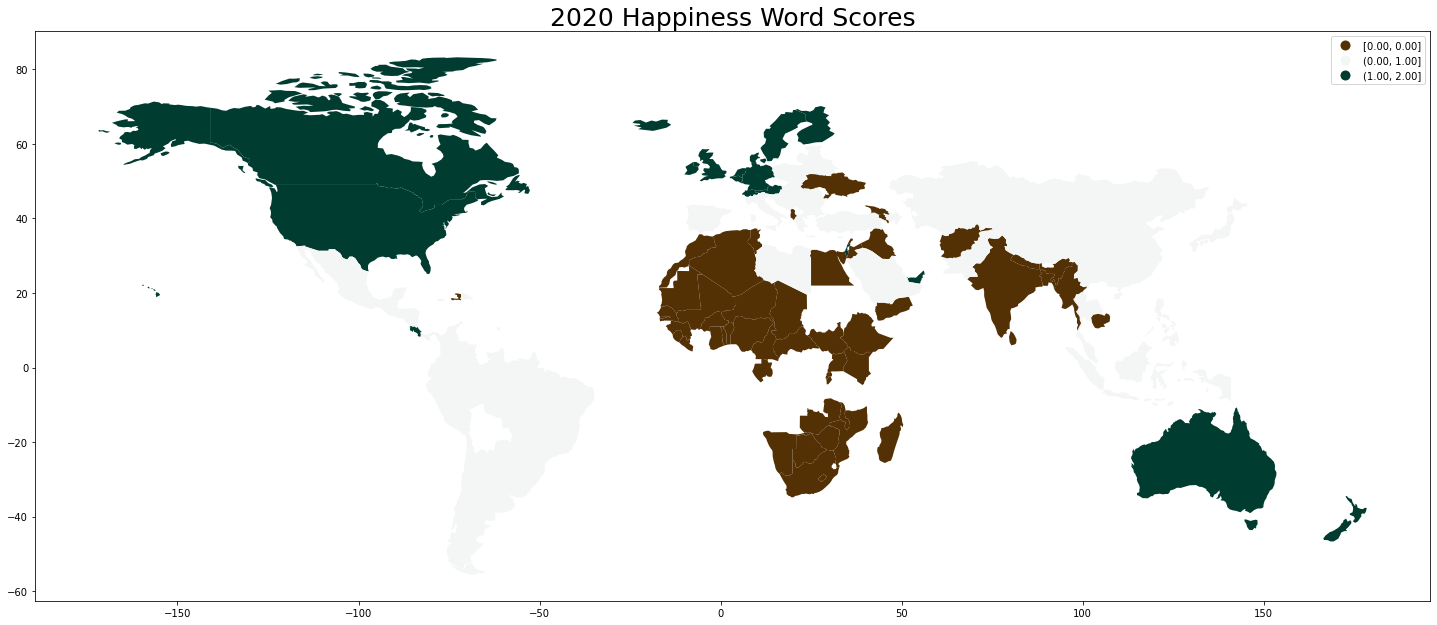

In [ ]:
merge_2020.plot(column='Cluster', scheme="quantiles",
           figsize=(25, 20),
           legend=True ,cmap='BrBG')

plt.title('2020 Happiness Word Scores',fontsize=25)

#### **Prediction**

In [ ]:
import io
from google.colab import files

import numpy as np
import pandas as pd
import tensorflow as tf

from keras import backend as K
from keras import callbacks
from keras import *
from keras.callbacks import History
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
# Join Data 2017 - 2020
df_result = pd.concat([df_2017, df_2018, df_2019, df_2020], join='inner')

In [ ]:
df_result.head()

,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Western Europe,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Western Europe,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Western Europe,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Western Europe,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Western Europe,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


In [ ]:
# Statistical Summary
df_result.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,5.402304,0.912617,1.191818,0.641598,0.429732,0.200507,0.119047
std,1.117254,0.397767,0.294213,0.254581,0.152100,0.111452,0.101660
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.556675,0.609500,1.037894,0.468752,0.331300,0.117162,0.052000
50%,5.385150,0.980054,1.245560,0.682323,0.450029,0.187000,0.088587
75%,6.191925,1.224500,1.430250,0.829021,0.549887,0.261073,0.146824
max,7.808700,2.096000,1.644000,1.141000,0.724000,0.838075,0.533162


In [ ]:
# Check Zero/Nan Value
df_result.isnull().sum()

Region                          0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [ ]:
# Replace Zero/Nan Value with Data Mean
del df_result['Region']
df_result.fillna(0)
df_result.eq(0).sum()
df_result.replace(0,df_result.mean(axis=0),inplace=True)

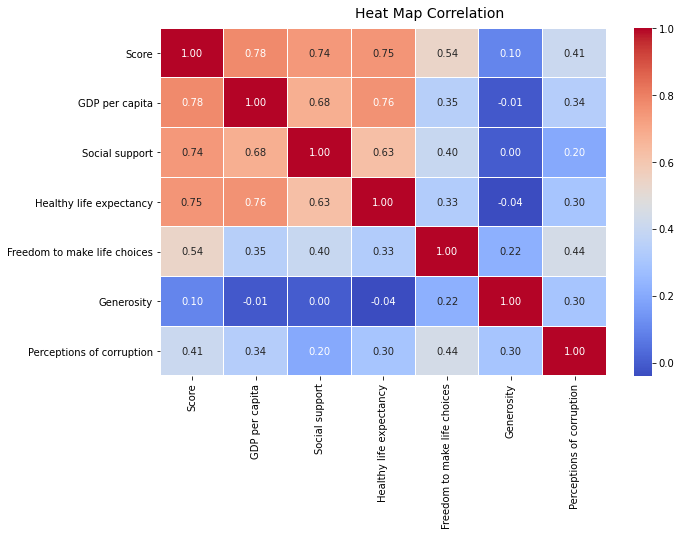

In [ ]:
# Data Visualitation
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 6))
corr = df_result.corr()
hm = sns.heatmap(round(corr,2), 
                 annot=True, 
                 ax=ax, 
                 cmap="coolwarm",
                 fmt='.2f',
                 linewidths=.05)

f.subplots_adjust(top=0.93)
t= f.suptitle('Heat Map Correlation', fontsize=14)

In [ ]:
# Normalisasi
target = np.array(df_result["Score"]).reshape(-1,1)
X = StandardScaler().fit_transform(df_result.drop(["Score"], axis=1))
X = np.nan_to_num(X)
n_inpt, inpt_size = X.shape

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, shuffle=False, random_state=0)      

In [ ]:
# Statistic Summary Hasil Normalisasi
scaled_df = pd.DataFrame(X, columns=['GDP per capita',
                                     'Social support',
                                     'Healthy life expectancy',
                                     'Freedom to make life choices',
                                     'Generosity','Perceptions of corruption'])
scaled_df.describe()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02
mean,1.210501e-16,6.073994e-16,2.929556e-16,2.729783e-16,-7.395518e-17,-7.091102e-17
std,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00
min,-2.293651e+00,-3.048734e+00,-2.570290e+00,-2.855144e+00,-1.739233e+00,-1.179872e+00
25%,-7.641897e-01,-5.466353e-01,-6.804911e-01,-6.656619e-01,-7.516185e-01,-6.545151e-01
50%,1.575833e-01,1.657504e-01,1.468908e-01,1.184195e-01,-1.200605e-01,-3.055782e-01
75%,7.834325e-01,8.304714e-01,7.358839e-01,7.932303e-01,5.379385e-01,2.654898e-01
max,3.014712e+00,1.599783e+00,1.988477e+00,1.969826e+00,5.774648e+00,4.090269e+00


In [ ]:
#Callback
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start) 

from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0.001,
                          patience = 100,
                          verbose = 1,
                          restore_best_weights = True)

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [Score]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()

  plt.figure(figsize=(10,5))  
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Score]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()

In [ ]:
def build_model(frame_size): #membangun model dengan 64 neuron pada hidden layer menggunakan fungsi aktivasi relu
  model = keras.Sequential([
    layers.Dense(20, activation=tf.nn.tanh, input_dim=frame_size),
    layers.Dense(1)
  ]) 
  
  #Menentukan optimizer yang akan digunakan
  #optimizer = keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True)
  #adam_opt = keras.optimizers.Adam(learning_rate=0.0001, 
  #                                 beta_1=0.9, 
  #                                 beta_2=0.999,
  #                                 epsilon=1e-07,
  #                                 amsgrad=False,
  #                                 name="Adam")

  #Menentukan loss function dan menghitung error
  model.compile(loss='mean_squared_error',
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [ ]:
# Training Model
EPOCHS = 500

model = build_model(inpt_size)
time_callback = TimeHistory()

history = model.fit(
    X_train, y_train,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[earlystop, time_callback])

Restoring model weights from the end of the best epoch.
Epoch 00496: early stopping


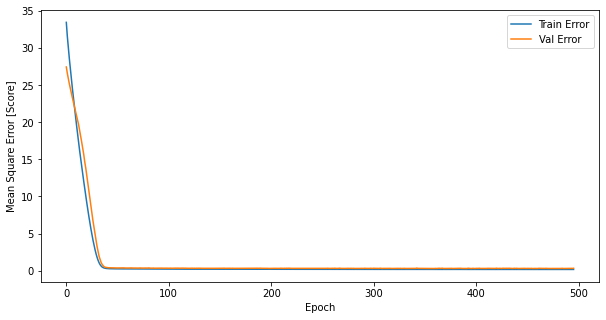

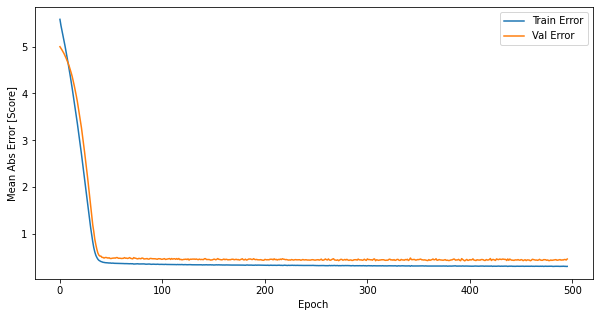

In [ ]:
# Plot Training-Validation
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plt.show()
plot_history(history)

In [ ]:
# Test Model 
loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)
y_predictions = model.predict(X_test)

# Hasil Prediksi
hasil = list([y_test, y_predictions])
df_hasil = pd.DataFrame()
df_hasil['Aktual'] = [i for i in hasil[0]]
df_hasil['Prediksi'] = hasil[1]
print(df_hasil.head(6))

# Metric
print('\n')
print('Evaluasi Prediksi Model: ')
print("Testing set Mean Abs Error: {:5.5f}".format(mae))
print("Testing set Mean Squared Error: {:5.5f}".format(mse))

                 Aktual  Prediksi
0   [6.387400150299072]  6.090724
1   [6.377099990844727]  6.218979
2  [6.3755998611450195]  6.160843
3   [6.363399982452393]  6.277924
4   [6.348299980163574]  5.675167
5   [6.325200080871582]  5.405954


Evaluasi Prediksi Model: 
Testing set Mean Abs Error: 0.40644
Testing set Mean Squared Error: 0.27329


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f648997a3c8>]],
      dtype=object)

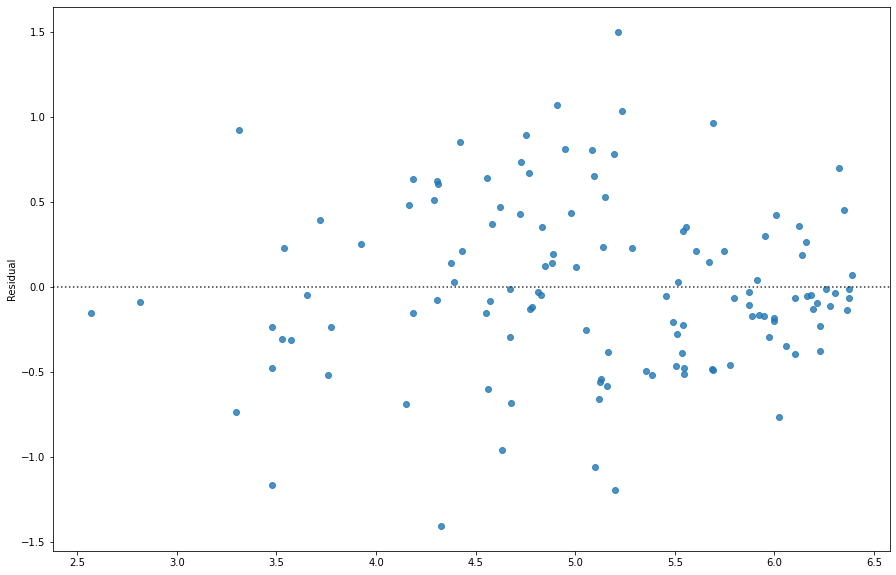

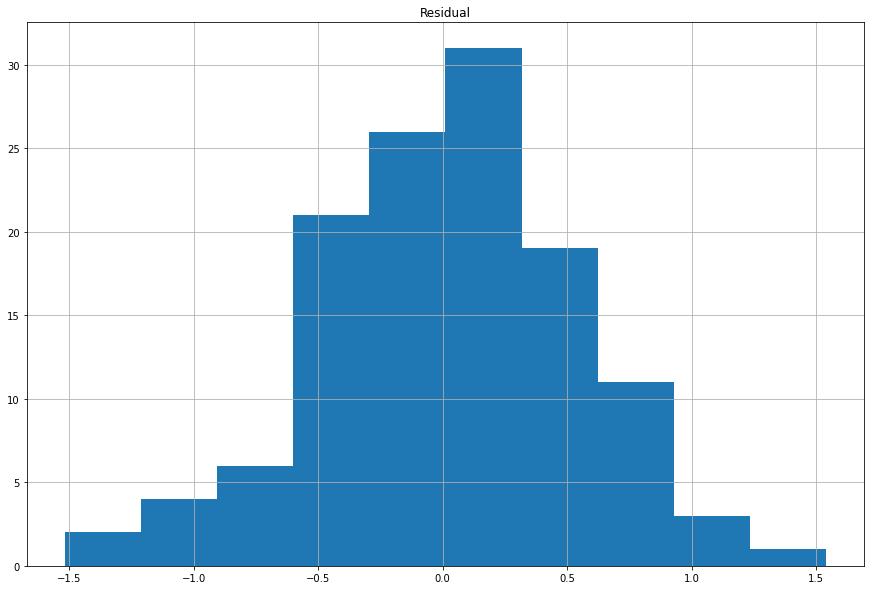

In [ ]:
# Visualisasi Hasil

##Analisis Residual
residual = y_test - y_predictions.reshape(-1,1)
residual2 = pd.DataFrame(residual, columns=['Residual'])
##Residual Plot
sns.residplot(y_test, residual2['Residual'])
##Residual Histogram
residual2.hist()

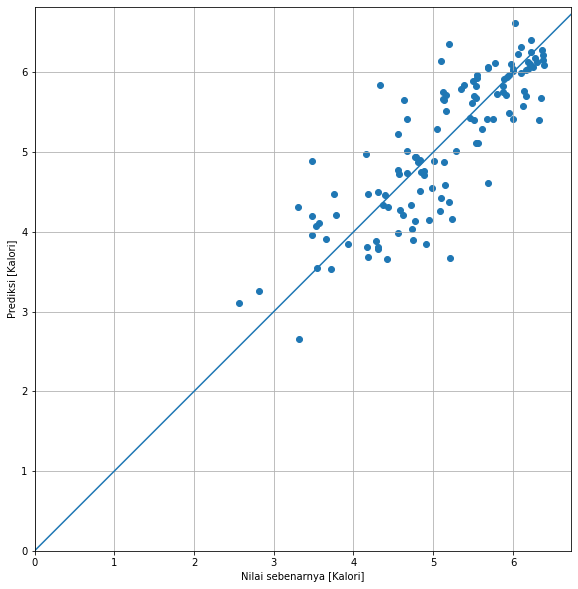

In [ ]:
##Residual vs Actual Plot
plt.scatter(y_test, y_predictions)
plt.xlabel('Nilai sebenarnya [Kalori]')
plt.ylabel('Prediksi [Kalori]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.grid(True)
_ = plt.plot([-100, 1000], [-100, 1000])